Tools used: 
- sra-tools https://github.com/ncbi/sra-tools 
- seqtk https://github.com/lh3/seqtk
- awk https://github.com/onetrueawk/awk
- colord (original) https://github.com/refresh-bio/CoLoRd ; compiled with `MEASURE_THREADS_TIMES` defined
- pandas, seqborn, matplotlib, tqdm... 

In [1]:
import os
import time
import gzip
import shutil

import numpy as np
import subprocess as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import OrderedDict, defaultdict
from tqdm import tqdm
from pprint import pprint

from IPython.display import display

sns.set(style='whitegrid', font_scale=1.2)
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 100

In [2]:
data_folder = 'data/'
compress_mode = 'pbraw'
data_title = f'E. coli DETEC-E480, Illumina HiSeq 4000, Coverage 32x, colord compress-{compress_mode}'

chart_prefix = f'charts/ecoli/compress-{compress_mode}/illumina_32x_'
fastq_filepath = data_folder + 'SRR22543904_1-subs-cov-32.fastq'
# fastq_filepath = data_folder + 'SRR22543904_1.fastq'

reference_filepath = data_folder + 'GCF_027944955.1_ASM2794495v1_genomic.fna'

threads_to_check = 2. ** np.arange(0, 4)
threads_to_check = [int(t) for t in threads_to_check]
threads_to_check

[1, 2, 4, 8]

## Run `CoLoRd` for all files

In [3]:
logs, logs_r = [], []
CLRD="../colord/bin/colord"

# fastq
for threads in tqdm(threads_to_check):
    # without reference
    out = fastq_filepath.removesuffix('.fastq') + '.' + compress_mode + f'-threads-{threads}'
    log = fastq_filepath.removesuffix('.fastq') + '.' + compress_mode + f'-threads-{threads}.log'
    
    logs.append(log)
    if not os.path.isfile(log):
        cmd = [CLRD, 'compress-' + compress_mode, fastq_filepath, out, '--verbose', '--threads', str(threads), '2>', log]
        cmd = ' '.join(cmd)
        
        print(cmd)
        pr = sp.run(cmd, shell=True, capture_output=True, check=True)
        
    # with reference
    out = fastq_filepath.removesuffix('.fastq') + '.' + compress_mode + f'-threads-{threads}-ref'
    log = fastq_filepath.removesuffix('.fastq') + '.' + compress_mode + f'-threads-{threads}-ref.log'
    
    logs_r.append(log)
    if not os.path.isfile(log):
        cmd = [CLRD, 'compress-' + compress_mode, fastq_filepath, out, '--verbose', '--threads', str(threads),
               '--reference-genome', reference_filepath, '2>', log]
        cmd = ' '.join(cmd)
        
        print(cmd)
        pr = sp.run(cmd, shell=True, capture_output=True, check=True)

  0%|                                                                                                                                        | 0/4 [00:00<?, ?it/s]

../colord/bin/colord compress-pbraw data/SRR22543904_1-subs-cov-32.fastq data/SRR22543904_1-subs-cov-32.pbraw-threads-1 --verbose --threads 1 2> data/SRR22543904_1-subs-cov-32.pbraw-threads-1.log
../colord/bin/colord compress-pbraw data/SRR22543904_1-subs-cov-32.fastq data/SRR22543904_1-subs-cov-32.pbraw-threads-1-ref --verbose --threads 1 --reference-genome data/GCF_027944955.1_ASM2794495v1_genomic.fna 2> data/SRR22543904_1-subs-cov-32.pbraw-threads-1-ref.log


 25%|████████████████████████████████                                                                                                | 1/4 [01:29<04:27, 89.29s/it]

../colord/bin/colord compress-pbraw data/SRR22543904_1-subs-cov-32.fastq data/SRR22543904_1-subs-cov-32.pbraw-threads-2 --verbose --threads 2 2> data/SRR22543904_1-subs-cov-32.pbraw-threads-2.log
../colord/bin/colord compress-pbraw data/SRR22543904_1-subs-cov-32.fastq data/SRR22543904_1-subs-cov-32.pbraw-threads-2-ref --verbose --threads 2 --reference-genome data/GCF_027944955.1_ASM2794495v1_genomic.fna 2> data/SRR22543904_1-subs-cov-32.pbraw-threads-2-ref.log


 50%|████████████████████████████████████████████████████████████████                                                                | 2/4 [03:01<03:02, 91.11s/it]

../colord/bin/colord compress-pbraw data/SRR22543904_1-subs-cov-32.fastq data/SRR22543904_1-subs-cov-32.pbraw-threads-4 --verbose --threads 4 2> data/SRR22543904_1-subs-cov-32.pbraw-threads-4.log
../colord/bin/colord compress-pbraw data/SRR22543904_1-subs-cov-32.fastq data/SRR22543904_1-subs-cov-32.pbraw-threads-4-ref --verbose --threads 4 --reference-genome data/GCF_027944955.1_ASM2794495v1_genomic.fna 2> data/SRR22543904_1-subs-cov-32.pbraw-threads-4-ref.log


 75%|████████████████████████████████████████████████████████████████████████████████████████████████                                | 3/4 [04:14<01:22, 82.91s/it]

../colord/bin/colord compress-pbraw data/SRR22543904_1-subs-cov-32.fastq data/SRR22543904_1-subs-cov-32.pbraw-threads-8 --verbose --threads 8 2> data/SRR22543904_1-subs-cov-32.pbraw-threads-8.log
../colord/bin/colord compress-pbraw data/SRR22543904_1-subs-cov-32.fastq data/SRR22543904_1-subs-cov-32.pbraw-threads-8-ref --verbose --threads 8 --reference-genome data/GCF_027944955.1_ASM2794495v1_genomic.fna 2> data/SRR22543904_1-subs-cov-32.pbraw-threads-8-ref.log


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [05:09<00:00, 77.40s/it]


In [4]:
def parse_log_file(log):
    def construct_dict_(lines):
        return dict(map(str.strip, line.split(':', 1)) for line in lines)
    
    with open(log) as f:
        # messy hack with \t and dict
        
        lines_tab, lines_no_tab = [], []
        for line in f:
            if ':' in line and line[0] != '#':
                (lines_no_tab, lines_tab)[line[0] == '\t'].append(line)
        
        return (construct_dict_(lines_no_tab), construct_dict_(lines_tab))

## Calculate Total Time

In [5]:
# calculating stats for every file
def calculate_time_stats(threads_to_check, logs):   
    stats = defaultdict(list)
    for threads, logfile in zip(threads_to_check, logs):
        log, log_tab = parse_log_file(logfile)
        
        stats['Threads'].append(threads)
#         stats['Coverage'].append(coverage)
        stats['Total time, s'].append(float(log['Total time'][:-1]))
        
    return stats
        
time_stats = calculate_time_stats(threads_to_check, logs)
time_stats_r = calculate_time_stats(threads_to_check, logs_r)

In [6]:
df = pd.DataFrame.from_dict(time_stats)
df['Reference'] = False

df_r = pd.DataFrame.from_dict(time_stats_r)
df_r['Reference'] = True

df_time = pd.concat([df, df_r])
df_time

,Threads,"Total time, s",Reference
0,1,32.7489,False
1,2,34.1278,False
2,4,26.7704,False
3,8,20.1373,False
0,1,56.0473,True
1,2,57.7872,True
2,4,45.9075,True
3,8,34.1806,True


## Coverage vs Time Chart

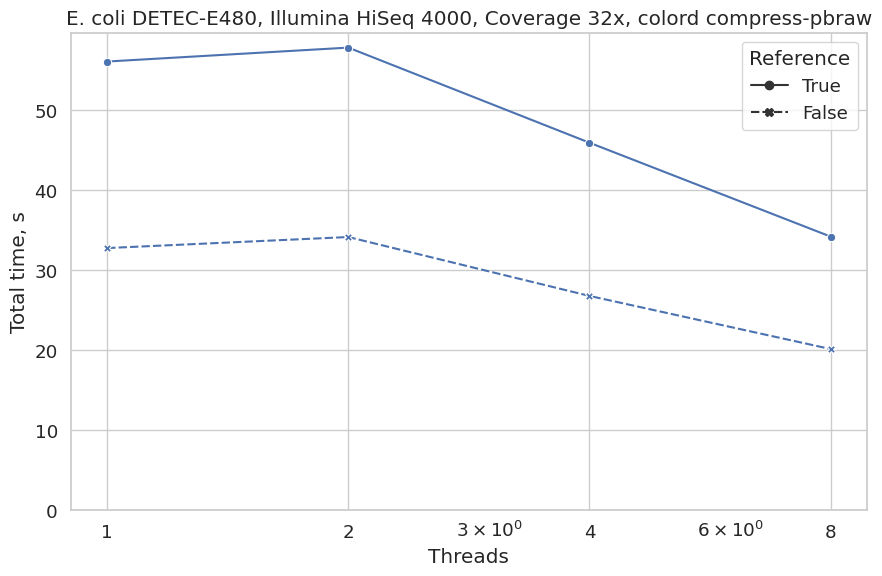

In [7]:
sns.lineplot(data=df_time, x='Threads', y='Total time, s', style='Reference', markers=True, style_order=[True, False])
plt.xscale('log')

plt.title(data_title)
plt.xticks(threads_to_check, [str(c) for c in threads_to_check]);
plt.ylim(ymin=0)
plt.tight_layout();
plt.savefig(chart_prefix + 'threads-vs-time.pdf');

## Calculate Threads Time

In [8]:
def collect_time_no_tab(log):
    # evene messier!
    with open(log) as f:
        return [float(line.removeprefix('Time: ').removesuffix('s\n'))
               for line in f if line.startswith("Time:")]

In [9]:
# calculating stats for every file
def calculate_threads_time_stats(threads_to_check, logs):   
    stats = defaultdict(list)
    for threads, logfile in zip(threads_to_check, logs):
        log, log_tab = parse_log_file(logfile)
        
        stats['Threads'].append(threads)
#         stats['Coverage'].append(coverage)
        
        times_no_tab = collect_time_no_tab(logfile)
        have_ref = len(times_no_tab) > 2
        
        time_io = float(log_tab['reader']) + \
                  float(log_tab['store result'])
            
        time_graph = sum(float(log_tab[col]) 
                         for col in ['similarity finder', 
                                     'mean similarity finder internal',
                                     'mean encoders',
                                     'mean encoders wait on queue']) + \
                    (times_no_tab[3] if have_ref else times_no_tab[0])
        
        time_coding = sum(float(log_tab[col]) 
                         for col in log_tab.keys() if col.startswith('entr. compr.'))
                     
        
        stats['Time - IO'].append(time_io)
        stats['Time - Sim.Graph'].append(time_graph)   
        stats['Time - RangeCoding'].append(time_coding)
        
    return stats
        
time_stats_th = calculate_threads_time_stats(threads_to_check, logs)
time_stats_th_r = calculate_threads_time_stats(threads_to_check, logs_r)

In [10]:
df = pd.DataFrame.from_dict(time_stats_th)
df['Reference'] = False

df_r = pd.DataFrame.from_dict(time_stats_th_r)
df_r['Reference'] = True

df_th_t = pd.concat([df, df_r])
df_th_t

,Threads,Time - IO,Time - Sim.Graph,Time - RangeCoding,Reference
0,1,2.019032,30.906801,3.330847,False
1,2,1.898574,32.686878,3.486343,False
2,4,2.143544,28.125283,3.769370,False
3,8,2.604045,20.420060,4.237695,False
0,1,1.985058,52.952538,2.038377,True
1,2,1.980486,55.636640,2.197766,True
2,4,2.292297,47.174464,2.314363,True
3,8,2.701893,34.598076,2.822281,True


## Coverage vs Thread Time

In [11]:
df_long = pd.melt(df_th_t, id_vars=['Threads', 'Reference'], 
                  value_vars=['Time - IO', 'Time - Sim.Graph', 'Time - RangeCoding'], 
                  var_name='Thread', value_name='Time, s')

df_long['Thread'] = [s[7:] for s in df_long['Thread']]
df_long

,Threads,Reference,Thread,"Time, s"
0,1,False,IO,2.019032
1,2,False,IO,1.898574
2,4,False,IO,2.143544
3,8,False,IO,2.604045
4,1,True,IO,1.985058
5,2,True,IO,1.980486
6,4,True,IO,2.292297
7,8,True,IO,2.701893
8,1,False,Sim.Graph,30.906801
9,2,False,Sim.Graph,32.686878


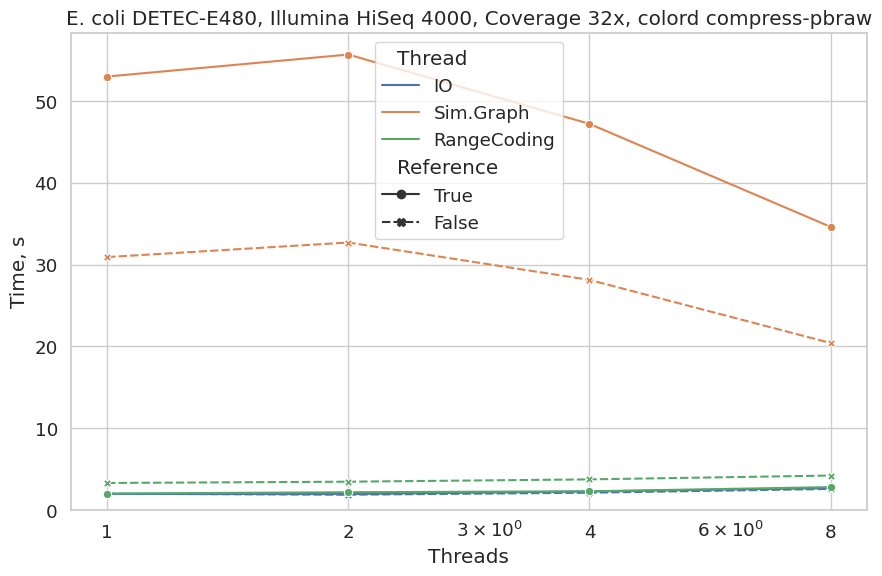

In [12]:
sns.lineplot(data=df_long, x='Threads', y='Time, s', hue='Thread', style='Reference', markers=True, style_order=[True, False])
plt.xscale('log')

plt.title(data_title)
plt.xticks(threads_to_check, [str(c) for c in threads_to_check]);
plt.ylim(ymin=0)
plt.tight_layout();
plt.savefig(chart_prefix + 'threads-vs-thread-time.pdf');
# plt.savefig(chart_prefix + 'thread-time-vs-ref.png', dpi=300);
